In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

##Q1-A

### Global Thresholding

In [ ]:
def global_thresholding(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img = cv2.medianBlur(img,5)
  ret, output = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
  return output

###Otsu

In [ ]:
def Otsu(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img = cv2.medianBlur(img,5)
  ret, output = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return output

###Adaptive Thresholding

In [ ]:
def adaptive_thresholding(img, adaptive_method, block_size, C):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img = cv2.medianBlur(img,5)
  output = cv2.adaptiveThreshold(img,255,adaptive_method,\
            cv2.THRESH_BINARY,block_size,C)
  return output

###Show results

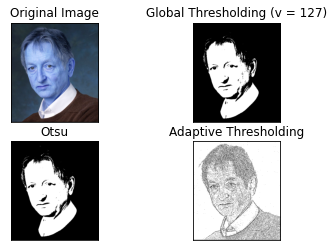

In [ ]:
img_path = '/content/drive/MyDrive/Digital Image Processing/HW6/hinton.jpg'
img = cv2.imread(img_path)
glb_th = global_thresholding(img)
otsu_th = Otsu(img)
adp_th = adaptive_thresholding(img, cv2.ADAPTIVE_THRESH_MEAN_C, 3, 3)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Otsu', 'Adaptive Thresholding']
images = [img, glb_th, otsu_th, adp_th]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


##Q1-B

## Q3

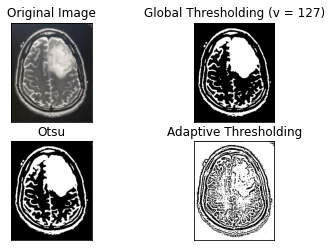

In [ ]:
brain_path = '/content/drive/MyDrive/Digital Image Processing/HW6/brain.jpg'
brain = cv2.imread(brain_path)
glb_th = global_thresholding(brain)
otsu_th = Otsu(brain)
adp_th = adaptive_thresholding(brain, cv2.ADAPTIVE_THRESH_MEAN_C, 5, 3)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Otsu', 'Adaptive Thresholding']
images = [brain, glb_th, otsu_th, adp_th]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


Text(0.5, 1.0, 'brain restored ')

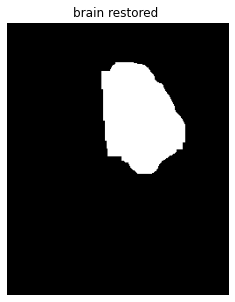

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
# output = cv2.erode(otsu_th,kernel,iterations = 4)
output = cv2.morphologyEx(otsu_th, cv2.MORPH_OPEN, kernel, iterations = 4)
plt.figure(figsize=(5,5))
plt.imshow(output, 'gray')
plt.axis('off')
plt.title('brain restored ')

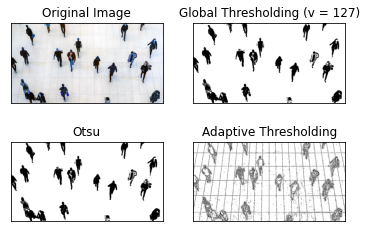

In [ ]:
humans_path = '/content/drive/MyDrive/Digital Image Processing/HW6/humans_1.jpg'
humans = cv2.imread(humans_path)
humans_hsv = cv2.cvtColor(humans, cv2.COLOR_BGR2HSV)
glb_th = global_thresholding(humans)
otsu_th = Otsu(humans)
adp_th = adaptive_thresholding(humans, cv2.ADAPTIVE_THRESH_MEAN_C, 5, 3)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Otsu', 'Adaptive Thresholding']
images = [humans, glb_th, otsu_th, adp_th]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Otsu Humans1 ')

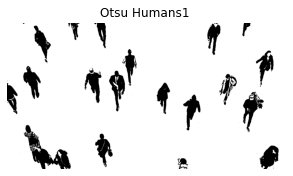

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(otsu_th, 'gray')
plt.axis('off')
plt.title('Otsu Humans1 ')

Text(0.5, 1.0, 'humans ')

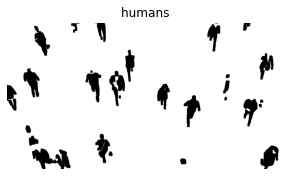

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
# output = cv2.dilate(otsu_th,kernel,iterations = 1)
output = cv2.morphologyEx(otsu_th, cv2.MORPH_CLOSE, kernel, iterations = 2)
plt.figure(figsize=(5,5))
plt.imshow(output, 'gray')
plt.axis('off')
plt.title('humans ')

Text(0.5, 1.0, 'humans hsv ')

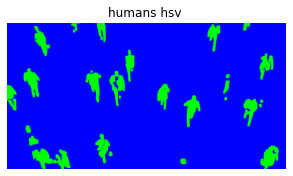

In [ ]:
result = output
image = humans_hsv
H = image[:,:,0]
S = image[:,:,1]
V = image[:,:,2]

# you shold implement part a,b,c and in the last use following code

for i in range(result.shape[0]):
  for j in range(result.shape[1]):
    if result[i][j] == 0:
      #fig1[i][j] = 128
      H[i][j] = 0
      S[i][j] = 255
      V[i][j] = 0
    else:
      H[i][j] = 0
      S[i][j] = 0
      V[i][j] = 255
image[:,:,0] = H
image[:,:,1] = S
image[:,:,2] = V

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.title('humans hsv ')

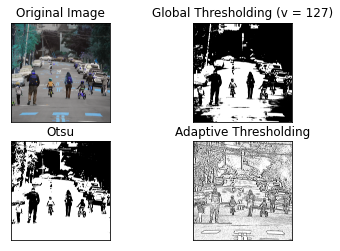

In [ ]:
humans2_path = '/content/drive/MyDrive/Digital Image Processing/HW6/humans_2.jpg'
humans2 = cv2.imread(humans2_path)
humans2_hsv = cv2.cvtColor(humans2, cv2.COLOR_BGR2HSV)
glb_th = global_thresholding(humans2)
otsu_th = Otsu(humans2)
adp_th = adaptive_thresholding(humans2, cv2.ADAPTIVE_THRESH_MEAN_C, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Otsu', 'Adaptive Thresholding']
images = [humans2, glb_th, otsu_th, adp_th]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Otsu Humans2 ')

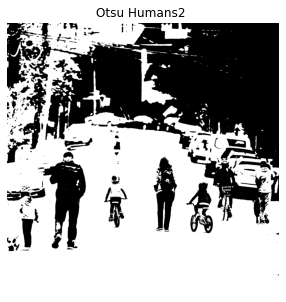

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(otsu_th, 'gray')
plt.axis('off')
plt.title('Otsu Humans2 ')

Text(0.5, 1.0, 'humans ')

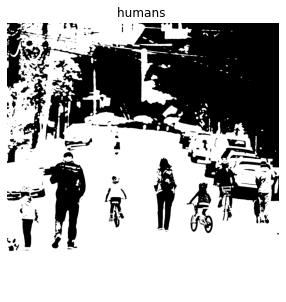

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
output = cv2.dilate(otsu_th,kernel,iterations = 1)
# output = cv2.morphologyEx(otsu_th, cv2.MORPH_CLOSE, kernel, iterations = 2)
plt.figure(figsize=(5,5))
plt.imshow(output, 'gray')
plt.axis('off')
plt.title('humans ')

## Q4

Text(0.5, 1.0, 'shapes ')

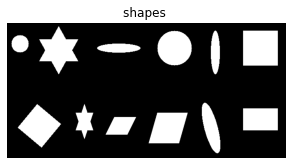

In [ ]:
shapes_path = '/content/drive/MyDrive/Digital Image Processing/HW6/shapes.jpg'
shapes = cv2.imread(shapes_path, 0)
plt.figure(figsize=(5,5))
plt.imshow(shapes, 'gray')
plt.axis('off')
plt.title('shapes ')

Text(0.5, 1.0, 'shapes ')

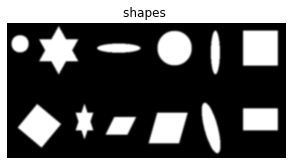

In [ ]:
shapes = cv2.GaussianBlur(shapes,(9,9),0)
plt.figure(figsize=(5,5))
plt.imshow(shapes, 'gray')
plt.axis('off')
plt.title('shapes ')

In [ ]:
def contours_center(img):
  contours,_ = cv2.findContours(img, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
  centers = []
  for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255,0), 2)
    center = (x,y)
    centers.append(center)
  return centers

def contours_aspect_ratio(img):
  contours,_ = cv2.findContours(img, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
  aspect_ratio_list = []
  for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = round(float(w)/h, 2)
    aspect_ratio_list.append(aspect_ratio)
  return aspect_ratio_list

def contours_extent(img):
  contours,_ = cv2.findContours(img, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
  extent_list = []
  for cnt in contours:
    area = cv2.contourArea(cnt)
    x,y,w,h = cv2.boundingRect(cnt)
    rect_area = w*h
    extent = round(float(area)/rect_area, 2)
    extent_list.append(extent)
  return extent_list

def contours_solidity(img):
  contours,_ = cv2.findContours(img, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
  solidity_list = []
  for cnt in contours:
    area = cv2.contourArea(cnt)
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    solidity = round(solidity, 2)
    solidity_list.append(solidity)
  return solidity_list

def contours_compactness(img):
  contours,_ = cv2.findContours(img, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
  compactness_list = []
  for cnt in contours:
    perimeter = cv2.arcLength(cnt,True)
    area = cv2.contourArea(cnt)
    compactness = (4 * np.pi * area )/ np.square(perimeter)
    compactness = round(compactness, 2)
    compactness_list.append(compactness)
  return compactness_list


(224, 216)  1.7  0.76   0.98  0.7
(326, 206)  1.22  0.8   0.93  0.68
(545, 196)  1.53  0.97   1.0  0.75
(156, 186)  0.57  0.63   0.81  0.51
(21, 185)  0.98  0.58   0.93  0.68
(448, 183)  0.43  0.63   0.94  0.54
(206, 46)  4.08  0.89   0.98  0.48
(6, 24)  0.96  0.82   0.99  0.89
(545, 16)  1.01  0.98   1.0  0.79
(471, 16)  0.24  0.86   0.98  0.49
(344, 16)  1.02  0.82   0.98  0.83
(71, 6)  0.81  0.58   0.77  0.48


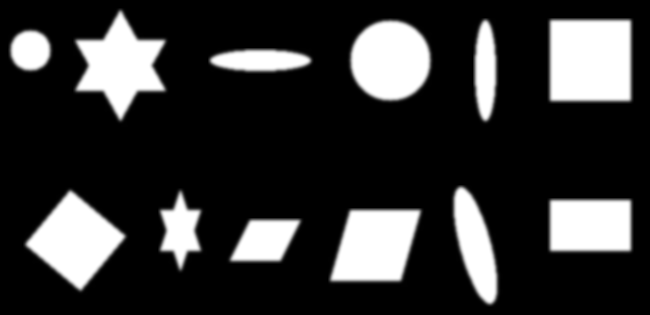

In [ ]:
shapes_center = contours_center(shapes)
shapes_aspect_ratio = contours_aspect_ratio(shapes)
shapes_extent = contours_extent(shapes)
shapes_solidity = contours_solidity(shapes)
shapes_compactness = contours_compactness(shapes)
for i in range(len(shapes_center)):
  print('{}  {}  {}   {}  {}'.format(shapes_center[i], shapes_aspect_ratio[i], shapes_extent[i], shapes_solidity[i], shapes_compactness[i]))
cv2_imshow(shapes)

[7, 10]
[2, 8]
[0, 1, 4]
[3, 11]
[5, 6, 9]


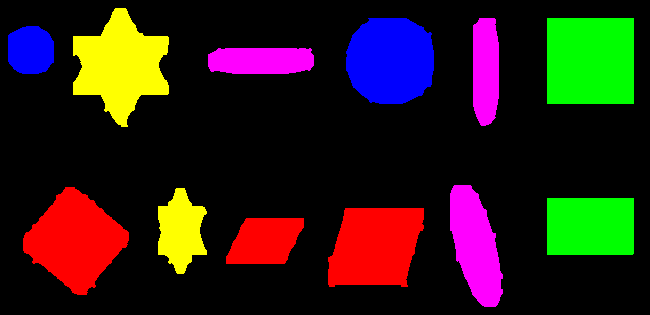

In [ ]:
circles = []
rects = []
diamonds = []
stars = []
ovals = []
drawing = np.zeros((shapes.shape[0], shapes.shape[1], 3), dtype=np.uint8)
contours,hierarchy = cv2.findContours(shapes, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
for i in range(len(shapes_center)):
  if shapes_compactness[i] >= 0.81:
    color = (255, 0, 0)
    cv2.drawContours(drawing, contours, i, color, -1, cv2.LINE_8, hierarchy, 0)
    circles.append(i)
  elif 0.6 <= shapes_compactness[i] <= 0.8:
    if shapes_solidity[i] == 1.0:
      color = (0, 255, 0)
      cv2.drawContours(drawing, contours, i, color, -1, cv2.LINE_8, hierarchy, 0)
      rects.append(i)
    elif shapes_solidity[i] < 1.0:
      diamonds.append(i)
      color = (0, 0, 255)
      cv2.drawContours(drawing, contours, i, color, -1, cv2.LINE_8, hierarchy, 0)
  elif shapes_compactness[i] < 0.6:
    if shapes_solidity[i] >= 0.9:
      color = (255, 0, 255)
      cv2.drawContours(drawing, contours, i, color, -1, cv2.LINE_8, hierarchy, 0)
      ovals.append(i)
    elif shapes_solidity[i] < 0.9:
      color = (0, 255, 255)
      cv2.drawContours(drawing, contours, i, color, -1, cv2.LINE_8, hierarchy, 0)
      stars.append(i)

print(circles)
print(rects)
print(diamonds)
print(stars)
print(ovals)
cv2_imshow(drawing)